In [57]:
import torch
import torchvision
from torchvision import transforms as T

from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [58]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

In [59]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [60]:
ig = Image.open("image1.jpg")

transform = T.ToTensor()
img = transform(ig)

with torch.no_grad():
    pred = model([img])
pred

[{'boxes': tensor([[293.2528,  76.1025, 351.1038, 229.6770],
          [137.8997, 126.8297, 197.2780, 192.5331],
          [234.4739, 187.5041, 257.2849, 206.2583],
          [215.8098, 186.9411, 232.0230, 201.3587],
          [204.4776, 187.4815, 220.2421, 207.7118],
          [229.2036, 178.4294, 242.4770, 189.1866],
          [ 78.8288, 182.9737, 287.0165, 227.3454],
          [217.1735, 200.3409, 231.4886, 214.5767],
          [231.4443, 200.6372, 247.8330, 217.5603],
          [ 98.9326, 118.4930, 110.6800, 178.1723],
          [204.0216, 181.9175, 254.2591, 215.2269],
          [264.9001, 134.4621, 293.9644, 137.9134],
          [233.0969, 189.1334, 246.5961, 201.5801],
          [259.2570, 132.6390, 298.8509, 138.4623],
          [ 99.3969, 132.8935, 110.2437, 177.1915],
          [205.5661, 185.3696, 234.8048, 210.6521],
          [102.6176, 119.1193, 109.7853, 136.2179],
          [232.0405, 127.2193, 299.3530, 138.4127],
          [175.0140, 110.0502, 185.5784, 137.5253],
   

In [61]:
bboxes, label, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]

num = torch.argwhere(scores > 0.9).shape[0]

coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , 
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , 
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , 
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" , 
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

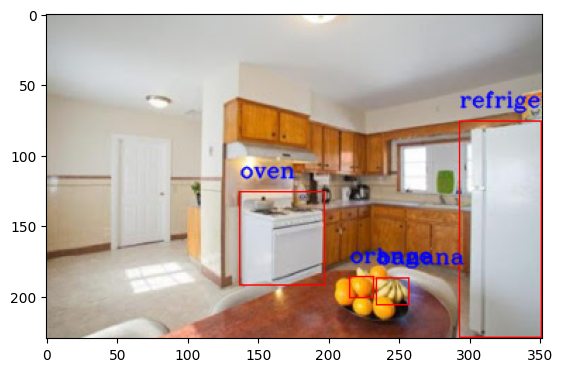

In [62]:
igg = cv2.imread('image1.jpg')
font = cv2.FONT_HERSHEY_COMPLEX
for i in range(num):
    x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
    class_name = coco_names[label.numpy()[i]-1]
    igg = cv2.rectangle(igg, (x1, y1), (x2, y2), (0, 0, 255), 1)
    igg = cv2.putText(igg, class_name, (x1, y1 - 10), font, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
igg = cv2.cvtColor(igg, cv2.COLOR_BGR2RGB)
plt.imshow(igg)